In [1]:
import os
from IPython.display import Image, display
import PIL
from PIL import ImageOps
import re
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import imutils

# IJJEH MODEL _ Numerical cases

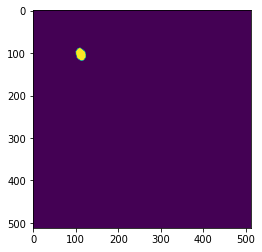

255.0


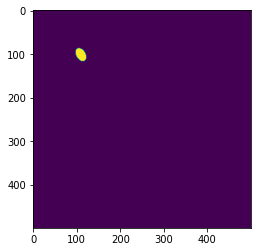

255.0
pred 523
GT 537
2.60707635009311


In [24]:
centre_sim = []
pred_area_ = []
gt_area_ = []
error = []
realAreaPerPixel = 1
# for i in range(95):
i = 16
os.chdir('/home/aijjeh/aijjeh_rexio_share/reports/figures/comparative_study/RMS_image_Segmentation_Thesis/New_2_March_2022/GCN/num/')
data1 = cv2.imread('GCN_65.png', 0)
plt.imshow(data1)
plt.show()
pred = cv2.resize(data1, (500,500))
pred = pred/np.max(pred)
pred = pred*255
pred[pred>=127]=255
pred[pred<127] = 0
print(np.max(pred))
os.chdir('/aijjeh_odroid_sensors/aidd/data/raw/num/dataset2_labels_out')
data2 = cv2.imread('m1_rand_single_delam_%d.png' % (381+i), 0)
plt.imshow(data2)
plt.show()
gt = cv2.resize(data2, (500,500))
gt = gt/np.max(gt)
gt = gt*255
print(np.max(gt))
pred_x_y = np.where(pred>(np.max(pred)/2))    
pred_coordinates = np.transpose(np.array(pred_x_y))
x = [p[1] for p in pred_coordinates]
y = [p[0] for p in pred_coordinates]
pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))

gt_x_y = np.where(gt>(np.max(gt)-55))    
gt_coordinates = np.transpose(np.array(gt_x_y))
x = [p[1] for p in gt_coordinates]
y = [p[0] for p in gt_coordinates]
gt_centroid = (sum(x) / len(gt_coordinates), sum(y) / len(gt_coordinates))
similarity = (pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5)
centre_sim.append(similarity)

pred_area_ones = np.where(pred>127)
pred_area = len(pred_area_ones[0])
print("pred",pred_area)
gt_area_ones = np.where(gt>127)
gt_area = len(gt_area_ones[0])
print("GT",gt_area)
percent = np.abs(gt_area-pred_area) / (gt_area)
pred_area_.append(pred_area)
gt_area_.append(gt_area)
error.append(percent)
print(percent*100)

In [ ]:
SIMM = sum(centre_sim)/len(centre_sim)
print(SIMM)

In [18]:
err = sum(error)/len(error)
print('percentage size error =', err*100,"%")

percentage size error = 97176.26459143969 %


# IJJEH MODEL _ Experimental cases CFRP_teflon_3o_375_375p_50kHz_5HC  

In [ ]:
centre_sim = []
pred_area_ = []
gt_area_ = []
error = []
realAreaPerPixel = 1

# os.chdir('/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Full_wavefield_frames_time_series_project/AE_exp_results_frames_24_512_512/CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp/RMS_iou')
# data1 = cv2.imread('RMS_CFRP_teflon_3o_375_375p_50kHz_5HC_ijjeh_cmap_viridis_greyscale_THRESHOLDED.png', 0)
# pred = cv2.resize(data1, (500,500))
# pred = pred / np.max(pred)
# pred = pred * 255
# pred = pred.astype(np.uint8)
####################################################################################################################
os.chdir('/aijjeh_odroid_sensors/aidd/reports/journal_papers/MSSP_Paper/Figures/')
data1 = cv2.imread('Predicted_Predicted_ERMS_CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp_7_softmax.png', 0)
pred = cv2.resize(data1, (500,500))
pred = pred / np.max(pred)
pred = pred * 255
# pred = pred.astype(np.uint8)
pred[pred>=128]= 255
pred[pred<128] = 0
####################################################################################################################
os.chdir('/aijjeh_odroid_sensors/aidd/data/interim/exp')
data2 = cv2.imread('label_CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp.png',0)
gt = cv2.resize(data2, (500,500))
gt = gt / np.max(gt)
gt = gt * 255
gt = gt.astype(np.uint8)


############################################################################################################
plt.figure(figsize=(4 / 2.54, 2 / 2.54), dpi=600)
############################################################################################################
plt.subplot(1,2,1)
plt.imshow(pred)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gt)
plt.axis('off')

plt.show()
plt.close('all')

pred_x_y = np.where(pred>(np.max(pred)/2))    
pred_coordinates = np.transpose(np.array(pred_x_y))
x = [p[1] for p in pred_coordinates]
y = [p[0] for p in pred_coordinates]
pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))


gt_x_y = np.where(gt>(np.max(gt)-55))    
gt_coordinates = np.transpose(np.array(gt_x_y))
gt_x = [p[1] for p in gt_coordinates]
gt_y = [p[0] for p in gt_coordinates]
gt_centroid = (sum(gt_x) / len(gt_coordinates), sum(gt_y) / len(gt_coordinates))
centre_= (pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5)
centre_sim.append(centre_)



pred_area_ones = np.where(pred>128)
pred_area = len(pred_area_ones[0])

gt_area_ones = np.where(gt>128)
gt_area = len(gt_area_ones[0])

percent = np.abs(gt_area-pred_area) / (gt_area)
pred_area_.append(pred_area)
gt_area_.append(gt_area)
error.append(percent)
print('Pred area ', pred_area)
print('GT area ', gt_area)
print('(GT_area - Pred_area)/GT_area = ',percent *100,'%')

In [ ]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(pred, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

In [ ]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(gt, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

In [ ]:
pred_centre = [372, 372]
gt_center = [368, 370]

centre_sim = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for a single delamination case", centre_sim)

# Ijjeh Model _Experimental cases L3_S4_B_333x333p_50kHz_5HC

In [ ]:
centre_sim = []
os.chdir('/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Full_wavefield_frames_time_series_project/AE_exp_results_frames_24_512_512/CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp/RMS_iou')
data1 = cv2.imread('RMS_L3_S4_B_333x333p_50kHz_5HC_ijjeh_cmap_viridis_greyscale_THRESHOLDED.png', 0)
pred = cv2.resize(data1, (500,500))
pred = pred/ np.max(pred)
pred = pred * 255
pred = pred.astype(np.uint8)                   

os.chdir('/aijjeh_odroid_sensors/aidd/data/interim/exp/new_exp')
data2 = cv2.imread('label_L3_S4_B_333x333p_100kHz_10HC_14Vpp_x20_pzt.png',0)
gt = cv2.resize(data2, (500,500))
gt = gt / np.max(gt)
gt = gt * 255
gt = gt.astype(np.uint8)

############################################################################################################
plt.figure(figsize=(4 / 2.54, 2 / 2.54), dpi=600)
############################################################################################################
plt.subplot(1,2,1)
plt.imshow(gt)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(pred)
plt.axis('off')
plt.show()

pred_x_y = np.where(pred>(np.max(pred)/2))    
pred_coordinates = np.transpose(np.array(pred_x_y))
x = [p[1] for p in pred_coordinates]
y = [p[0] for p in pred_coordinates]
pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))

gt_x_y = np.where(gt>(np.max(gt)-55))    
gt_coordinates = np.transpose(np.array(gt_x_y))
x = [p[1] for p in gt_coordinates]
y = [p[0] for p in gt_coordinates]
gt_centroid = (sum(x) / len(gt_coordinates), sum(y) / len(gt_coordinates))

centre_sim.append((pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5))

pred_area_ones = np.where(pred>=128)
pred_area = len(pred_area_ones[0])

gt_area_ones = np.where(gt>=128)
gt_area = len(gt_area_ones[0])

percent = np.abs(gt_area-pred_area) / (gt_area)
pred_area_.append(pred_area)
gt_area_.append(gt_area)
error.append(percent)
print('Pred area ', pred_area)
print('GT area ', gt_area)
print('(GT_area - Pred_area)/GT_area = ',percent *100,'%')

In [ ]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(pred, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

In [ ]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(gt, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

In [ ]:
pred_centre = [358, 354]
gt_center = [355, 355]

centre_sim_1 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 1st delamination", centre_sim_1)

In [ ]:
pred_centre = [94, 244]
gt_center = [99, 249]

centre_sim_2 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 2nd delamination", centre_sim_2)

In [ ]:
pred_centre = [250, 90]
gt_center = [249, 99]

centre_sim_3 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 3rd delamination",centre_sim_3)